In [500]:
# This project is aimed at predicting the case of customers' default payments in Taiwan.
# From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable
# than the binary result of classification - credible or not credible clients.

# We can use the K-S chart to evaluate which customers will default on their credit card payments.


In [501]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [502]:
# /content/drive/MyDrive/2 lab Nit mca/4th sem/INTERN/Credit Card Defaulter Prediction.xlsx
# /content/drive/MyDrive/2 lab Nit mca/4th sem/INTERN/Credit Card Defaulter Prediction_csv.csv

1 - Importing necessary liabraries and model techniques


In [503]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score #, plot_confusion_matrix

2 Loading the Dataset

In [504]:
# df1 = pd.read_excel("/content/drive/MyDrive/2 lab Nit mca/4th sem/INTERN/Credit Card Defaulter Prediction.xlsx")
# df1.head(10)

In [505]:
!pip install xlrd

import pandas as pd

In [506]:

df1 = pd.read_csv("/content/drive/MyDrive/2 lab Nit mca/4th sem/INTERN/Credit Card Defaulter Prediction_csv.csv")

df1.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [507]:
df1 = df1.rename(columns={"default ": "default_payment", "PAY_0": "PAY_1"})

In [508]:
df1_main = df1.copy()
df1_main.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y


In [509]:
df1.shape

(30000, 25)

In [510]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               30000 non-null  int64 
 1   LIMIT_BAL        30000 non-null  int64 
 2   SEX              30000 non-null  object
 3   EDUCATION        30000 non-null  object
 4   MARRIAGE         30000 non-null  object
 5   AGE              30000 non-null  int64 
 6   PAY_1            30000 non-null  int64 
 7   PAY_2            30000 non-null  int64 
 8   PAY_3            30000 non-null  int64 
 9   PAY_4            30000 non-null  int64 
 10  PAY_5            30000 non-null  int64 
 11  PAY_6            30000 non-null  int64 
 12  BILL_AMT1        30000 non-null  int64 
 13  BILL_AMT2        30000 non-null  int64 
 14  BILL_AMT3        30000 non-null  int64 
 15  BILL_AMT4        30000 non-null  int64 
 16  BILL_AMT5        30000 non-null  int64 
 17  BILL_AMT6        30000 non-null

In [511]:
df1.describe()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [512]:
# find null values
df1.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64

In [513]:
df1.duplicated().any()

False

In [514]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

In [515]:
# Renaming the target column for better reference. and changing PAY_0 to PAY_1.
df1.rename(columns={"default" : "default_payment", "PAY_0":"PAY_1"}, inplace=True)
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

In [516]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [517]:
# Count in diff categorical columns
for columns in ["SEX","EDUCATION","MARRIAGE"]:
    print(df1[columns].value_counts())
    print("", end="\n")

F    18112
M    11888
Name: SEX, dtype: int64

University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

Single     15964
Married    13659
Other        323
0             54
Name: MARRIAGE, dtype: int64



In [518]:
# df1.rename(columns={"default" : "default_payment"}, inplace=True)

In [519]:
df1["default_payment"].value_counts()

N    23364
Y     6636
Name: default_payment, dtype: int64

In [635]:
df1["SEX"].value_counts()

0       18112
MALE    11888
Name: SEX, dtype: int64

In [521]:
df1.groupby("default_payment")["SEX"].value_counts(ascending=True)

default_payment  SEX
N                M       9015
                 F      14349
Y                M       2873
                 F       3763
Name: SEX, dtype: int64

In [522]:
plt.rcParams["figure.figsize"]=(10,6)

In [523]:
def plot_vis(col):
    sns.countplot(x = col, hue=df1.default_payment)

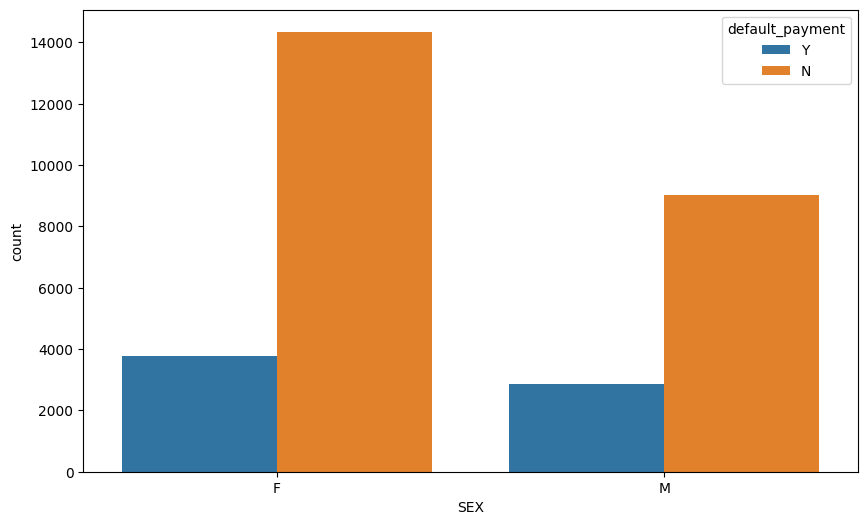

In [524]:
plot_vis(df1.SEX)

In [525]:
df1.EDUCATION.value_counts()

University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

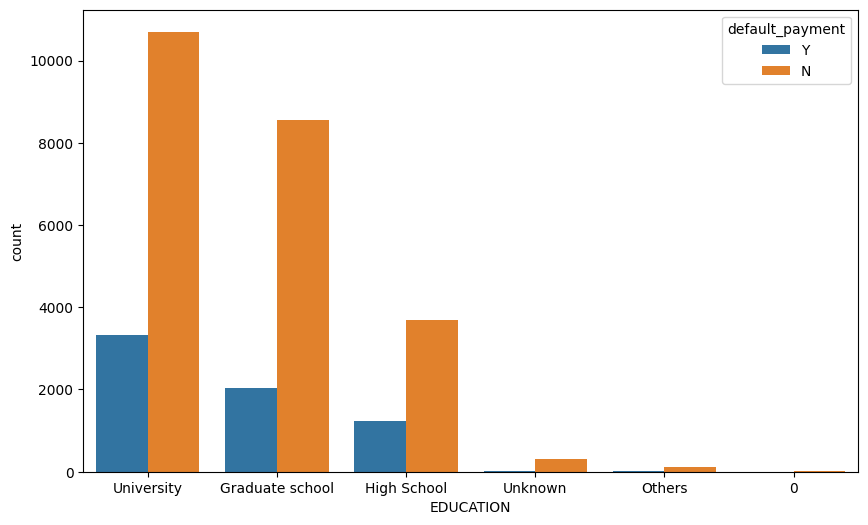

In [526]:
plot_vis(df1.EDUCATION)

In [527]:
# df1.loc[df1.MARRIAGE==0, "MARRIAGE"] = 3
# df1.MARRIAGE.value_counts()

In [528]:
# fil = df1['MARRIAGE'] == 0
# df1.loc[fil, 'MARRIAGE'] = "Other"
# df1['MARRIAGE'].value_counts()


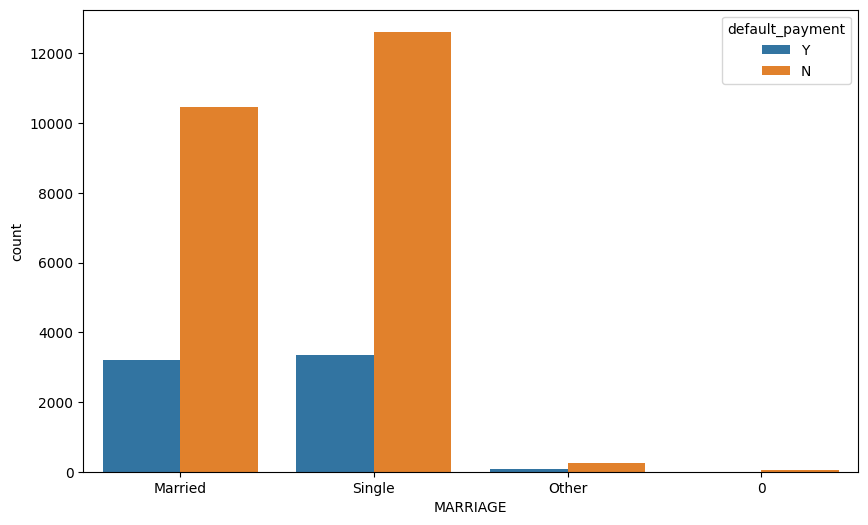

In [529]:
plot_vis(df1.MARRIAGE)

In [530]:
df1.MARRIAGE.value_counts()

Single     15964
Married    13659
Other        323
0             54
Name: MARRIAGE, dtype: int64

In [531]:
for columns in df1.columns:
    print(columns," : ", df1[columns].nunique())

ID  :  30000
LIMIT_BAL  :  81
SEX  :  2
EDUCATION  :  6
MARRIAGE  :  4
AGE  :  56
PAY_1  :  11
PAY_2  :  11
PAY_3  :  11
PAY_4  :  11
PAY_5  :  10
PAY_6  :  10
BILL_AMT1  :  22723
BILL_AMT2  :  22346
BILL_AMT3  :  22026
BILL_AMT4  :  21548
BILL_AMT5  :  21010
BILL_AMT6  :  20604
PAY_AMT1  :  7943
PAY_AMT2  :  7899
PAY_AMT3  :  7518
PAY_AMT4  :  6937
PAY_AMT5  :  6897
PAY_AMT6  :  6939
default_payment  :  2


In [532]:
df1.dtypes

ID                  int64
LIMIT_BAL           int64
SEX                object
EDUCATION          object
MARRIAGE           object
AGE                 int64
PAY_1               int64
PAY_2               int64
PAY_3               int64
PAY_4               int64
PAY_5               int64
PAY_6               int64
BILL_AMT1           int64
BILL_AMT2           int64
BILL_AMT3           int64
BILL_AMT4           int64
BILL_AMT5           int64
BILL_AMT6           int64
PAY_AMT1            int64
PAY_AMT2            int64
PAY_AMT3            int64
PAY_AMT4            int64
PAY_AMT5            int64
PAY_AMT6            int64
default_payment    object
dtype: object

In [533]:
cat_columns = []
num_columns = []

for columns in df1.columns:
    if df1[columns].nunique()<12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_payment']
Numerical Columns Are :  ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


Here "SEX", "EDUCATION", "MARRIAGE","PAY_1 TO PAY_6" are Categorical Columns and rest are Numerical columns

In [534]:
num_columns.remove("ID")
cat_columns.remove("default_payment")

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


change cat col to int

In [638]:
# Replace 'F' with 0 and 'M' with 1 in the 'SEX' column
df1['SEX'] = df1['SEX'].replace({'F': 0, 'MALE': 1})

In [639]:
df1.SEX.value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

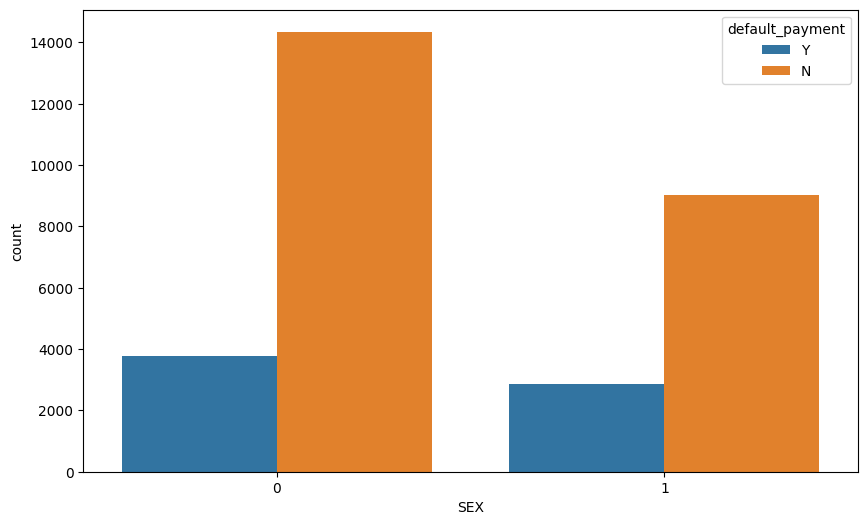

In [537]:
plot_vis(df1.SEX)

In [538]:
df1.EDUCATION.value_counts()

University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

Education has 6 categories where 1,2,3 are having most of the data points and remaining 0,5,6 can be merged into value 4.

In [625]:
# Calculate the frequency of each category in the 'EDUCATION' column
education_counts = df1['EDUCATION'].value_counts()

# Sort the categories based on their frequencies in descending order
sorted_categories = education_counts.sort_values(ascending=False)

# Create a mapping dictionary to assign labels based on the sorted order
education_mapping = {category: i+1 for i, category in enumerate(sorted_categories.index)}

# Map the values in the 'EDUCATION' column using the mapping dictionary
df1['EDUCATION'] = df1['EDUCATION'].map(education_mapping)


In [626]:
fil = (df1['EDUCATION'] == 5) | (df1['EDUCATION'] == 6)
df1.loc[fil, 'EDUCATION'] = 4
df1['EDUCATION'].value_counts()

1    14030
2    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

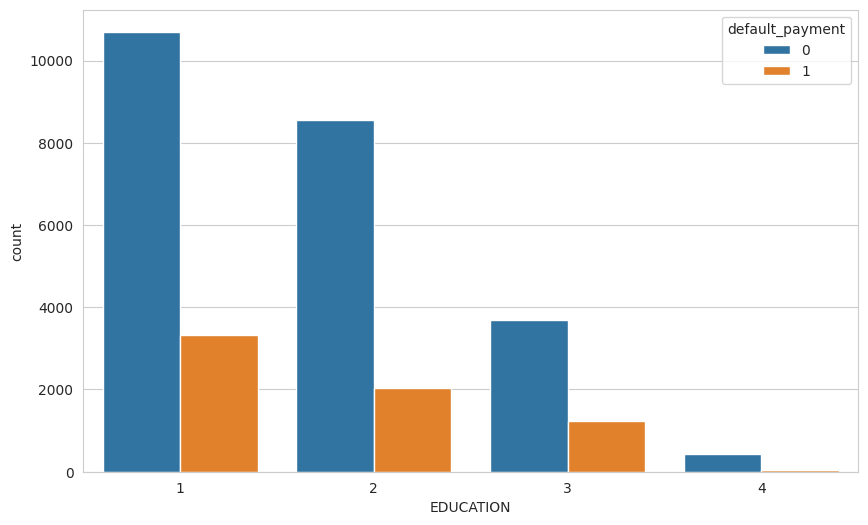

In [627]:
plot_vis(df1.EDUCATION)

In [629]:
df1['EDUCATION'].value_counts()

1    14030
2    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [628]:
df1['MARRIAGE'].value_counts()

1    15964
2    13659
3      377
Name: MARRIAGE, dtype: int64

**# We have few values for 0, which are not determined . So I am adding them in Others category.**

In [543]:
# Calculate the frequency of each category in the 'EDUCATION' column
MARRIAGE_counts = df1['MARRIAGE'].value_counts()

# Sort the categories based on their frequencies in descending order
sorted_categories = MARRIAGE_counts.sort_values(ascending=False)

# Create a mapping dictionary to assign labels based on the sorted order
MARRIAGE_mapping = {category: i+1 for i, category in enumerate(sorted_categories.index)}

# Map the values in the 'EDUCATION' column using the mapping dictionary
df1['MARRIAGE'] = df1['MARRIAGE'].map(MARRIAGE_mapping)

In [544]:
fil = df1['MARRIAGE'] == 4
df1.loc[fil, 'MARRIAGE'] = 3
df1['MARRIAGE'].value_counts()

1    15964
2    13659
3      377
Name: MARRIAGE, dtype: int64

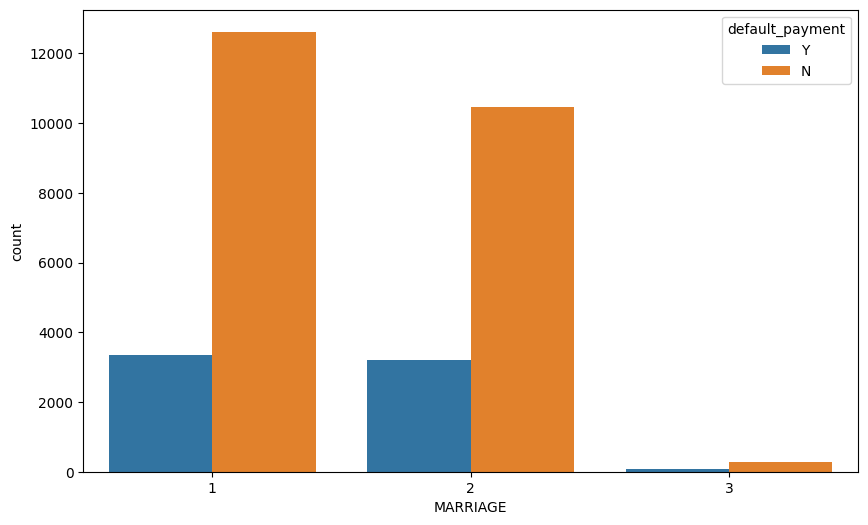

In [545]:
plot_vis(df1.MARRIAGE)

In [546]:
df1.MARRIAGE.value_counts()

1    15964
2    13659
3      377
Name: MARRIAGE, dtype: int64

EDA For Numerical Columns

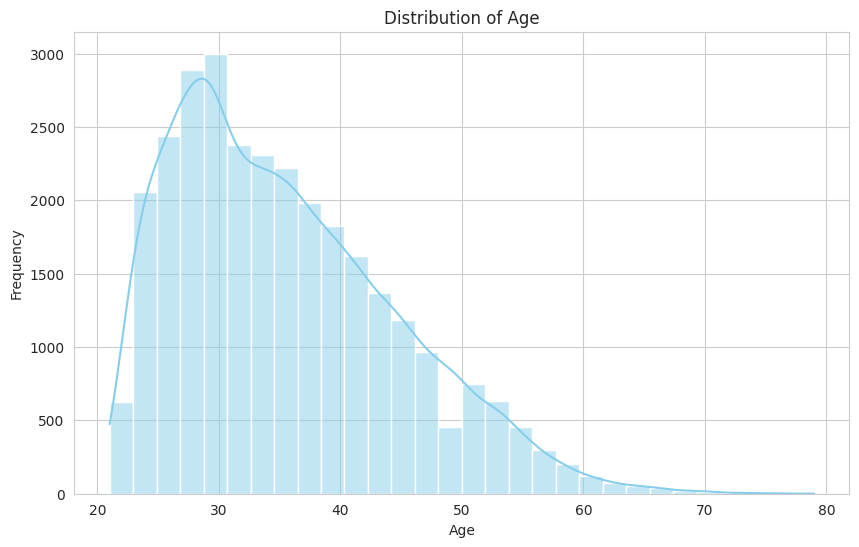

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a histogram for the 'AGE' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='AGE', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


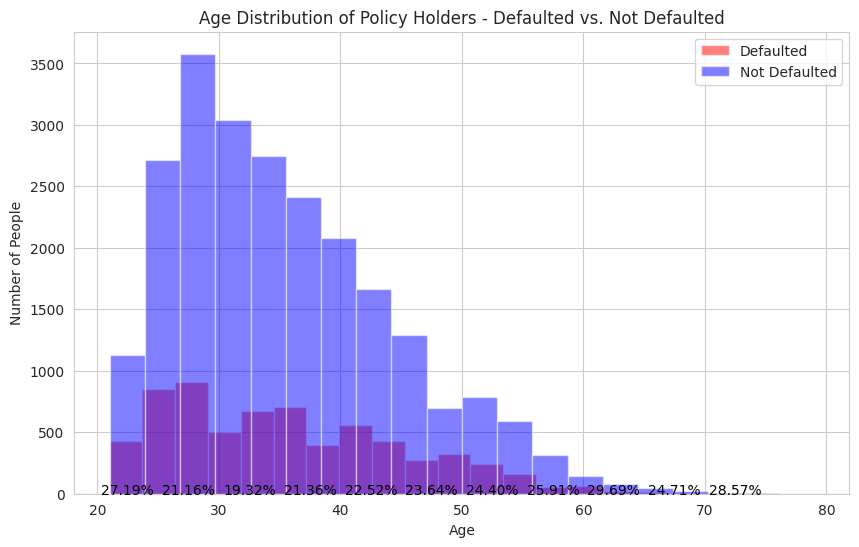

In [587]:
import matplotlib.pyplot as plt

# Filter DataFrame for individuals who have taken a policy
policy_df = df1[(df1['default_payment'] == 1) | (df1['default_payment'] == 0)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram for age distribution of individuals who defaulted
ax.hist(policy_df[policy_df['default_payment'] == 1]['AGE'], bins=20, alpha=0.5, color='red', label='Defaulted')

# Plot histogram for age distribution of individuals who did not default
ax.hist(policy_df[policy_df['default_payment'] == 0]['AGE'], bins=20, alpha=0.5, color='blue', label='Not Defaulted')

# Calculate percentage of defaults for each age bracket
age_bins = range(20, 80, 5)
for i in range(len(age_bins) - 1):
    age_range = f'{age_bins[i]}-{age_bins[i+1]}'
    default_count = policy_df[(policy_df['AGE'] >= age_bins[i]) & (policy_df['AGE'] < age_bins[i+1]) & (policy_df['default_payment'] == 1)].shape[0]
    total_count = policy_df[(policy_df['AGE'] >= age_bins[i]) & (policy_df['AGE'] < age_bins[i+1])].shape[0]
    percent_default = (default_count / total_count) * 100 if total_count != 0 else 0
    ax.text((age_bins[i] + age_bins[i+1]) / 2, 30, f'{percent_default:.2f}%', ha='center', va='center', color='black')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Number of People')
ax.set_title('Age Distribution of Policy Holders - Defaulted vs. Not Defaulted')
ax.legend()

# Show plot
plt.show()


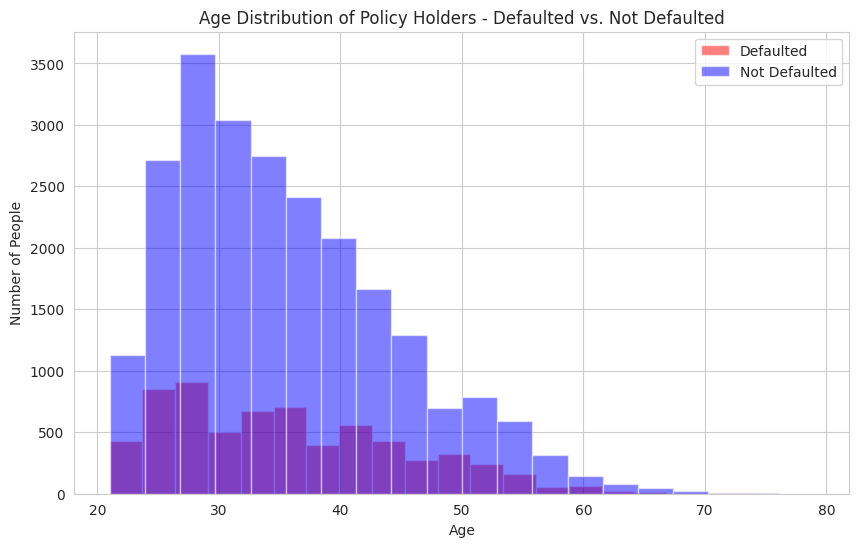

In [611]:
import matplotlib.pyplot as plt

# Filter DataFrame for individuals who have taken a policy and defaulted
defaulted_df = df1[(df1['default_payment'] == 1)]

# Filter DataFrame for individuals who have taken a policy but did not default
not_defaulted_df = df1[(df1['default_payment'] == 0)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram for age distribution of individuals who defaulted
ax.hist(defaulted_df['AGE'], bins=20, alpha=0.5, color='red', label='Defaulted')

# Plot histogram for age distribution of individuals who did not default
ax.hist(not_defaulted_df['AGE'], bins=20, alpha=0.5, color='blue', label='Not Defaulted')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Number of People')
ax.set_title('Age Distribution of Policy Holders - Defaulted vs. Not Defaulted')
ax.legend()

# Show plot
plt.show()


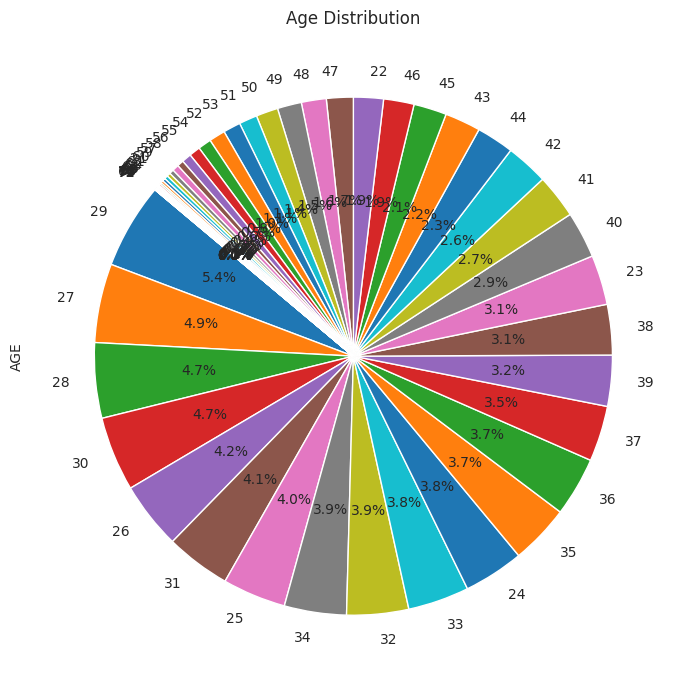

In [619]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(7, 7))

# Plot pie chart for age distribution
df1['AGE'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=140, ax=ax)
ax.set_title('Age Distribution')

# Show plot
plt.tight_layout()
plt.show()


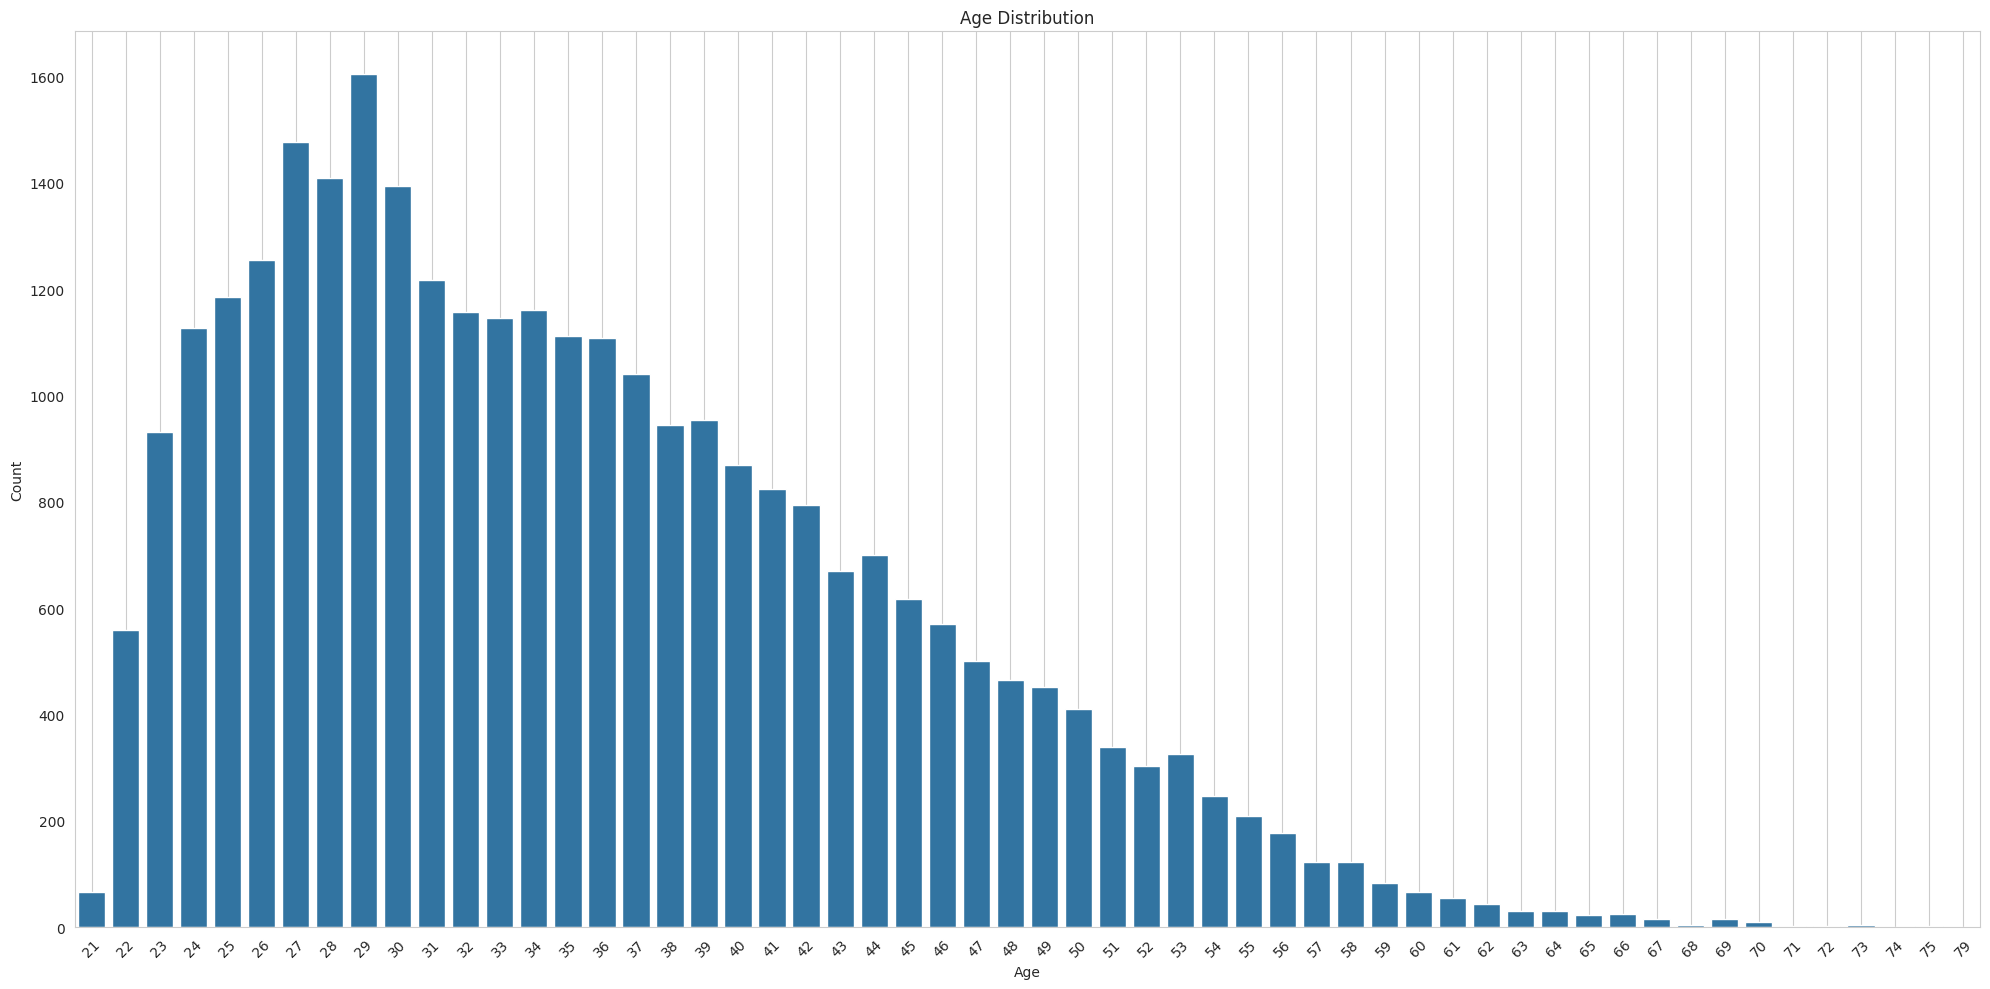

In [614]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plot bar chart for age distribution
sns.barplot(x=df1['AGE'].value_counts().index, y=df1['AGE'].value_counts(), ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid()
plt.tight_layout()
plt.show()


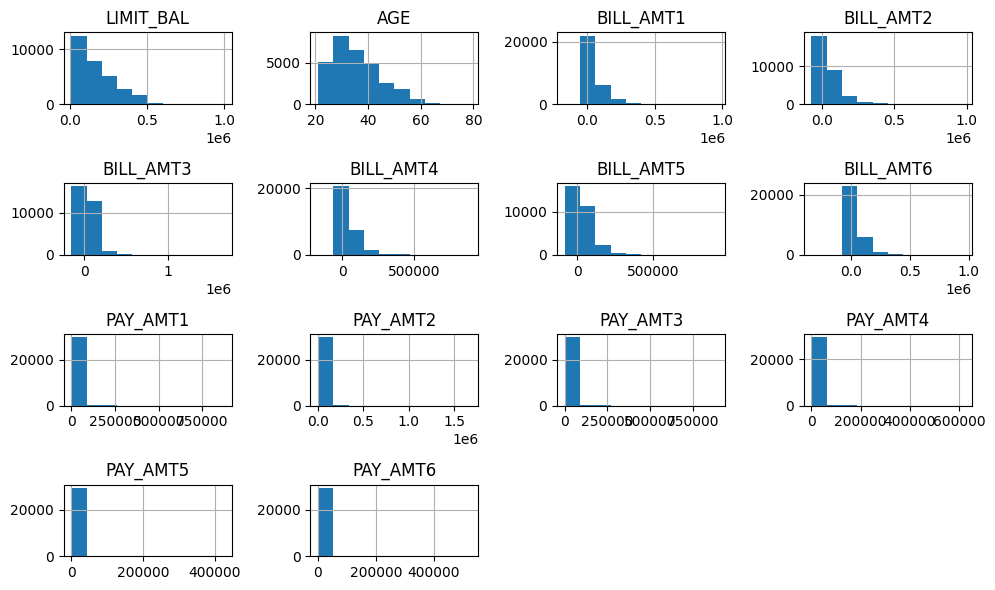

In [547]:
df1[num_columns].hist()
plt.tight_layout()
plt.show()

The numerical columns need to be converted into the Gaussian Distribution

In [548]:
def sub_plots_num(col):
    plt.subplot(1,2,1)
    sns.histplot(x=col, hue = df1["default_payment"])

    plt.subplot(1,2,2)
    sns.boxplot(y=col, x=df1["default_payment"])

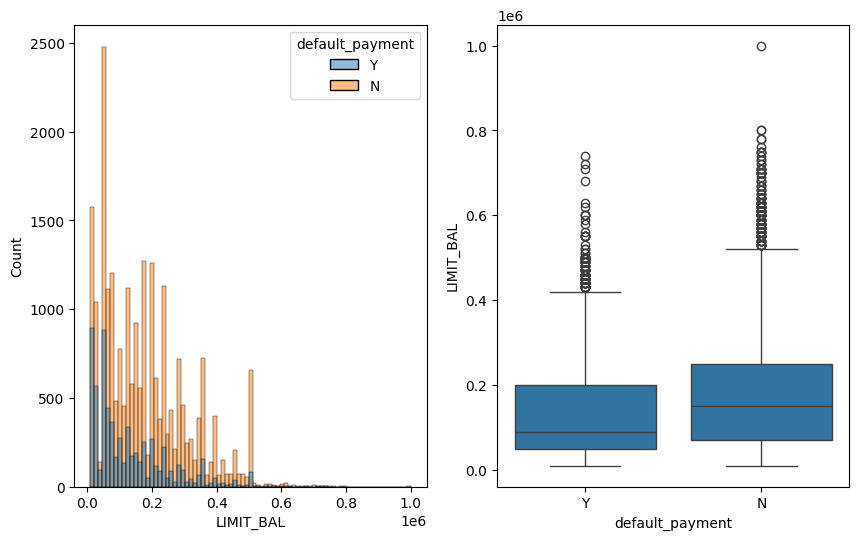

In [549]:
sub_plots_num(df1["LIMIT_BAL"])

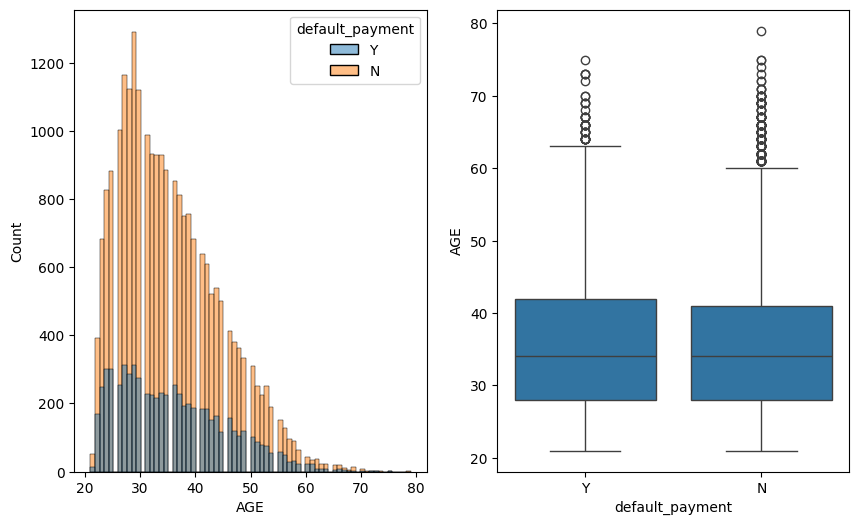

In [550]:
sub_plots_num(df1["AGE"])

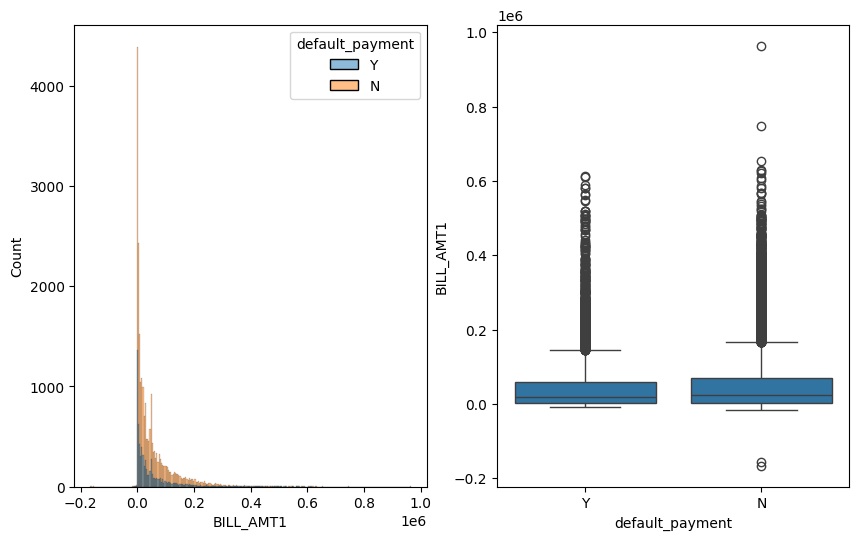

In [551]:
sub_plots_num(df1["BILL_AMT1"])

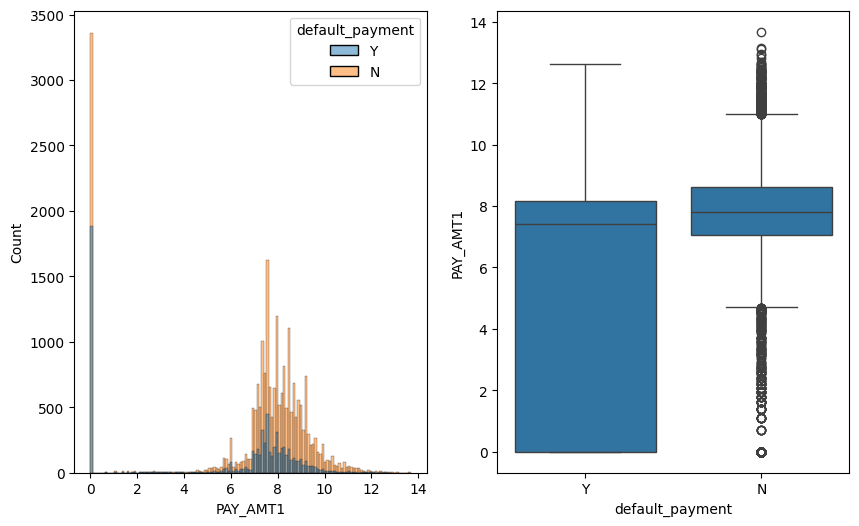

In [552]:
sub_plots_num(np.log1p(df1["PAY_AMT1"]))

EDA For Categorical Columns

In [553]:
cat_columns

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [554]:
def plot_cat_columns(col):
    pie_val = df1.groupby(col)["default_payment"].mean()

    plt.subplot(1,2,1)
    sns.countplot(x=col, data=df1)

    plt.subplot(1,2,2)
    plt.pie(pie_val, autopct= "%0.1f%%", labels = pie_val.index)

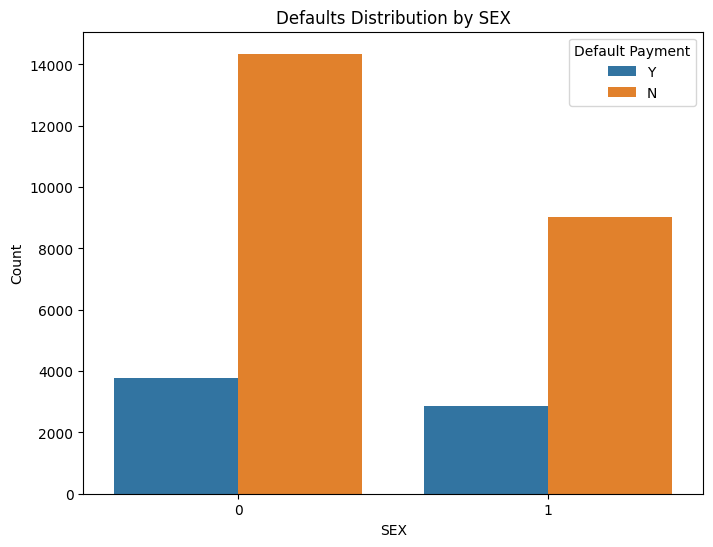

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat_columns(column_name):
    # Clean column name (remove leading/trailing whitespaces)
    column_name = column_name.strip()

    plt.figure(figsize=(8, 6))
    sns.countplot(data=df1, x=column_name, hue='default_payment')
    plt.title(f'Defaults Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.legend(title='Default Payment', loc='upper right')
    plt.show()

plot_cat_columns("SEX")


Female have higher chances of default than Male

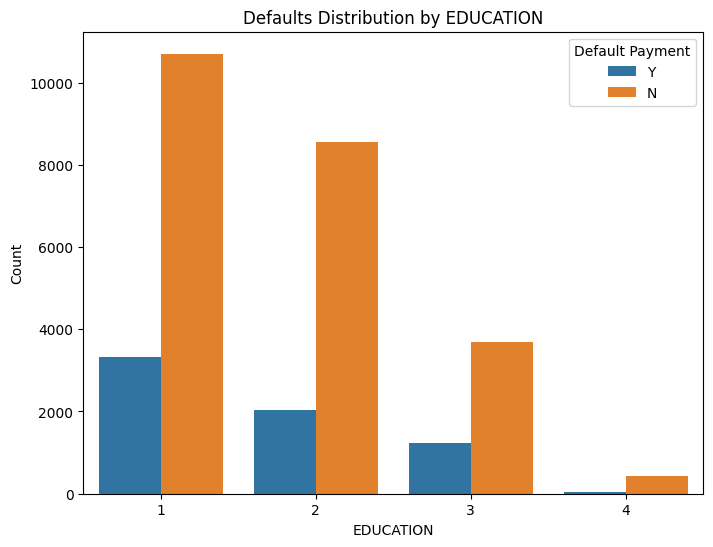

In [556]:
plot_cat_columns("EDUCATION")

Although the number of defaulters are higher in people having University level education but the people having High School education have higher chances of deafult.

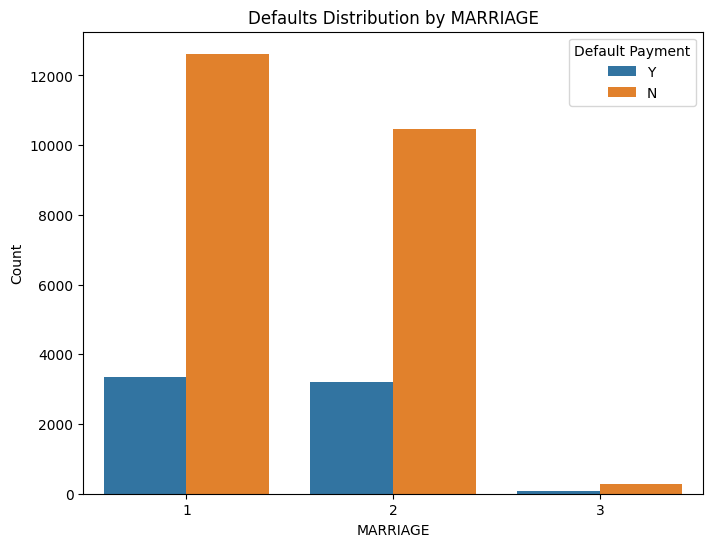

In [557]:
plot_cat_columns("MARRIAGE")

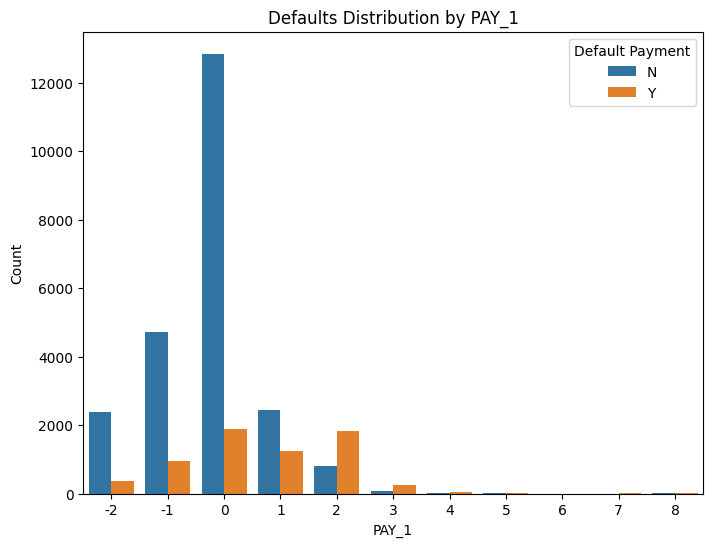

In [558]:
plot_cat_columns("PAY_1")

As the repayment gets delayed by 1 month, the chances of default increase

In [559]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [560]:
df_cat = df1[categorical_features]
df_cat['default_payment'] = df1['default_payment']
df_cat.tail()

,SEX,EDUCATION,MARRIAGE,default_payment
29995,1,3,2,N
29996,1,3,1,N
29997,1,1,1,Y
29998,1,3,2,Y
29999,1,1,2,Y


In [561]:


# # Replace 'University' with 1, 'Graduate school' with 2, and other values with 0 in the 'EDUCATION' column
# df1['EDUCATION'] = df1['EDUCATION'].replace({'Graduate school':1, 'University':2, 'High School':3, 'Others':4})

# # Replace 'Married' with 1, 'Single' with 2, and other values with 0 in the 'MARRIAGE' column
# df1['MARRIAGE'] = df1['MARRIAGE'].replace({'Married': 1, 'Single': 2, 'Others': 0})

In [622]:
df1.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,0,graduate school,2,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,graduate school,1,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [632]:
df1.drop('ID',axis = 1, inplace = True)


KeyError: "['ID'] not found in axis"

In [633]:
df1.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,0,1,2,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,1,1,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [640]:
df1.dtypes

LIMIT_BAL          int64
SEX                int64
EDUCATION          int64
MARRIAGE           int64
AGE                int64
PAY_1              int64
PAY_2              int64
PAY_3              int64
PAY_4              int64
PAY_5              int64
PAY_6              int64
BILL_AMT1          int64
BILL_AMT2          int64
BILL_AMT3          int64
BILL_AMT4          int64
BILL_AMT5          int64
BILL_AMT6          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
default_payment    int64
dtype: object

In [641]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,default_payment
0,0,1,2,Y
1,0,1,1,Y
2,0,1,1,N
3,0,1,2,N
4,1,1,2,N


In [642]:
# Replace 'Y' with 1 and 'N' with 0
df1['default_payment'] = df1['default_payment'].replace({'Y': 1, 'N': 0})

In [643]:
df1.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,0,1,2,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,1,1,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,1,1,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,1,2,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,1,2,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Differentiating Independent and dependent features

<Axes: title={'center': 'Correlation with Default'}>

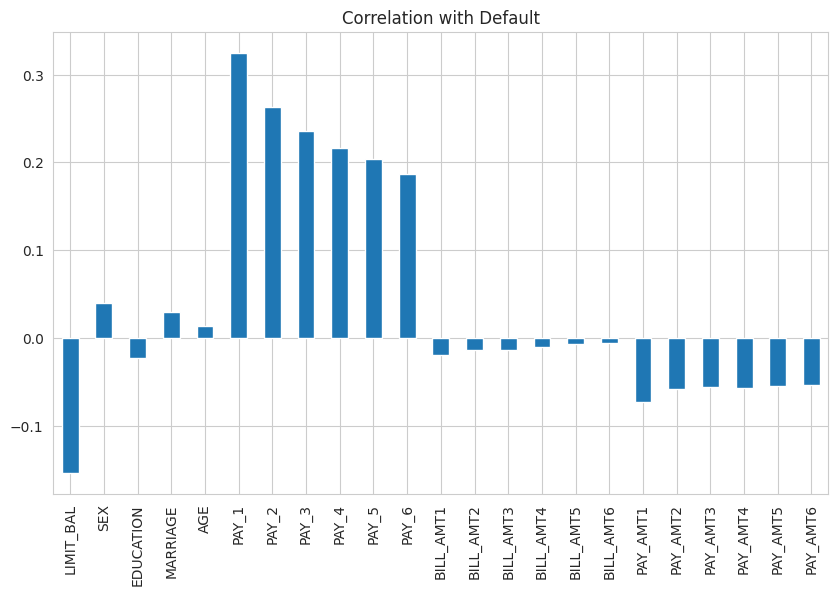

In [644]:
X = df1.drop(['default_payment'],axis=1)
X.corrwith(df1['default_payment']).plot.bar(figsize = (10, 6), title = "Correlation with Default",
                                        fontsize = 10,rot = 90, grid = True)

In [645]:
# X = df1.drop(["ID", "default_payment"], axis=1)
y = df1["default_payment"]



In [646]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,1,2,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,1,1,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,1,1,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,1,2,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,1,2,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,2,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,1,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,1,1,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,2,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [647]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment, Length: 30000, dtype: int64

Creating Functions For Model Training And Evaluation

In [572]:
len(df1.columns)

25

BaseLine Model
A baseline model that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline's performance (e.g., accuracy)-- this metric will then become what you compare any other machine learning algorithm against.
I will build logistic regression without any hyperparameter tuning or feature engineering

In [649]:
X = df1.drop(['default_payment'], axis=1)
y = df1['default_payment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

Accuracy: 0.7788333333333334


NameError: name 'cross_val_score' is not defined

In [651]:
!pip install scikit-learn
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LR, X, y, cv=5)

In [652]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.7788333333333334

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000


Average 5-Fold CV Score: 0.7786 , Standard deviation: 0.0003


baseline model has an accuracy of 0.78. We have to better this with other models

Feature Engineering

In [653]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
df1=df1.apply(outlier_capping)

In [660]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for column in df1.columns:
    if column != 'default_payment':
        df1[column] = scaler.fit_transform(np.array(df1[column]).reshape(-1,1))

In [661]:
# Train Test Split
X = df1.drop(['default_payment'], axis=1)
y = df1['default_payment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [662]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [663]:
# We have observed that there is imbalance in the samples. Let's see the distribution of the samples in the train dataset
# Separate majority and minority classes
df_majority = df_train[df_train.default_payment == 0]
df_minority = df_train[df_train.default_payment == 1]

print(df_majority.default_payment.count())
print("-----------")
print(df_minority.default_payment.count())
print("-----------")
print(df_train.default_payment.value_counts())

18677
-----------
5323
-----------
0.0    18677
1.0     5323
Name: default_payment, dtype: int64


There's a lot of imbalance in the sample. So there are many ways to resampling!
Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution. This is a simple and effective strategy for imbalanced classification problems.
The simplest strategy is to choose examples for the transformed dataset randomly, called random resampling. There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.
-> Methods to solve class imbalance problem

A) Random Oversampling: Randomly duplicate examples in the minority class.
B) Random Undersampling: Randomly delete examples in the majority class.
C) SMOTE: Synthetic Minority Oversampling Technique

C) SMOTE: Synthetic Minority Oversampling Technique
The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling. The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model

In [664]:
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(y_SMOTE.value_counts())

0.0    18677
1.0    18677
Name: default_payment, dtype: int64


Model Building and evaluation

The evaluation will be based on K fold cross validation of AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve score which is considered as the best metric for binary classification and also the test score

In [665]:
# Helper Function for printing Accuracy matrices, plotting Confusiuon matrix and ROC curve

def helper(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d",
                xticklabels = ['Non-default', 'Default'],
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

In [667]:
from sklearn.metrics import roc_curve


Training Accuracy Score:  0.6724581035498206
Testing Accuracy Score:  0.6795
Precision on test data:  0.3701022146507666
Recall on test data:  0.6618431073876618
F1 score on test data:  0.4747336793225894

Classification Report on Train data
              precision    recall  f1-score   support

         0.0       0.68      0.67      0.68     18986
         1.0       0.66      0.68      0.67     18368

    accuracy                           0.67     37354
   macro avg       0.67      0.67      0.67     37354
weighted avg       0.67      0.67      0.67     37354


Classification Report on Test data
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77      3652
         1.0       0.66      0.37      0.47      2348

    accuracy                           0.68      6000
   macro avg       0.67      0.62      0.62      6000
weighted avg       0.68      0.68      0.65      6000




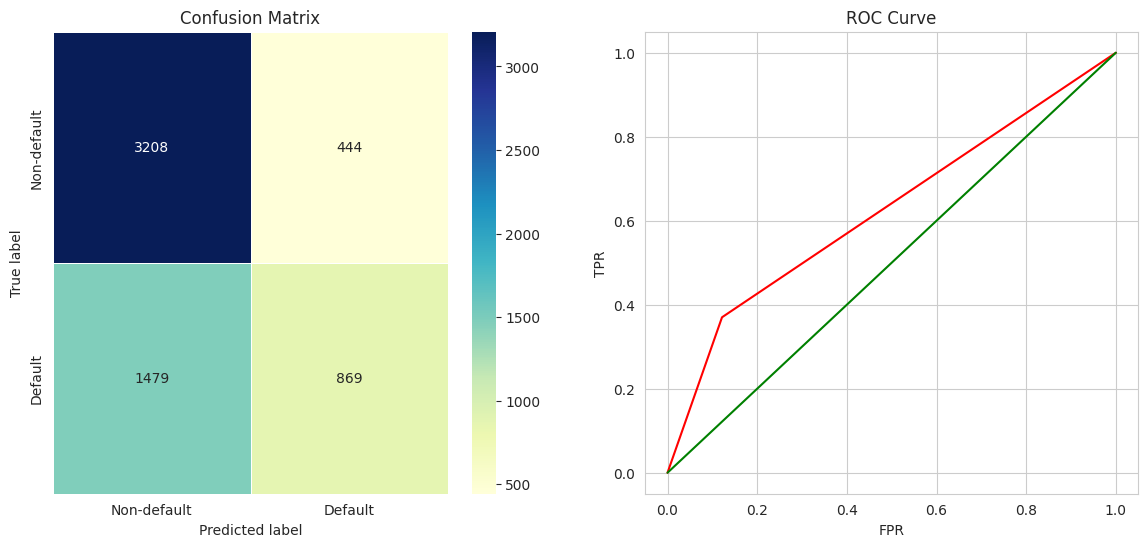

CPU times: user 1.4 s, sys: 486 ms, total: 1.89 s
Wall time: 1.28 s


In [668]:
%%time
lr = LogisticRegression()
lr = lr.fit(X_SMOTE, y_SMOTE)
Acc_mat_lr = helper(lr,X_SMOTE,y_SMOTE,X_test,y_test)


Training Accuracy Score:  0.6421534507683246
Testing Accuracy Score:  0.7753333333333333
Precision on test data:  0.48366013071895425
Recall on test data:  0.3945163747143945
F1 score on test data:  0.43456375838926176

Classification Report on Train data
              precision    recall  f1-score   support

         0.0       0.88      0.60      0.71     27554
         1.0       0.40      0.77      0.53      9800

    accuracy                           0.64     37354
   macro avg       0.64      0.68      0.62     37354
weighted avg       0.76      0.64      0.66     37354


Classification Report on Test data
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      4929
         1.0       0.39      0.48      0.43      1071

    accuracy                           0.78      6000
   macro avg       0.64      0.66      0.65      6000
weighted avg       0.79      0.78      0.78      6000




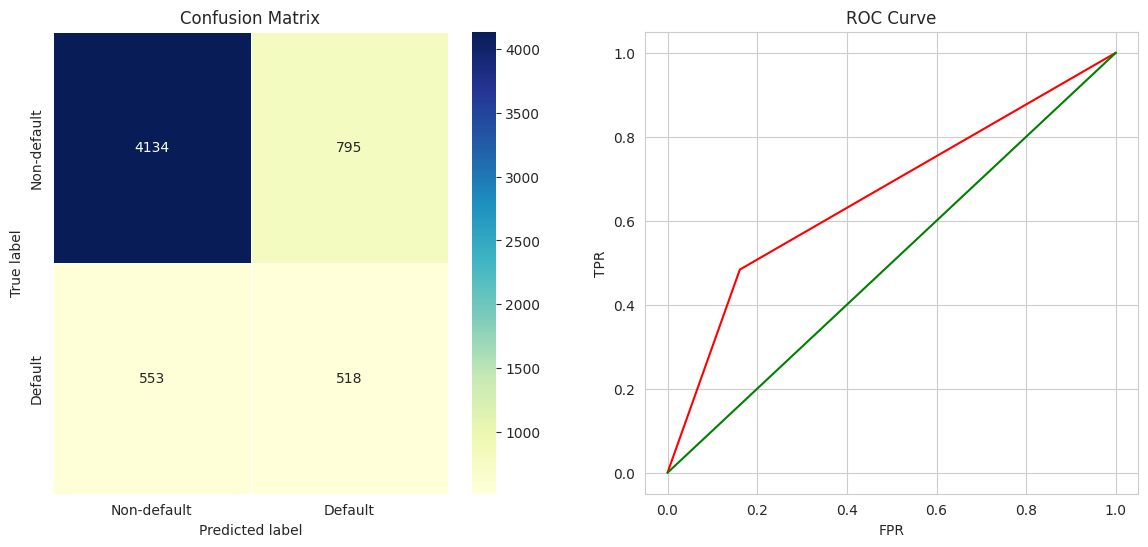

CPU times: user 868 ms, sys: 118 ms, total: 986 ms
Wall time: 869 ms


In [669]:
%%time
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
clf_tree = clf_tree.fit(X_SMOTE, y_SMOTE)

Acc_mat_dt = helper(clf_tree,X_SMOTE,y_SMOTE,X_test,y_test)


Training Accuracy Score:  0.8060180971248059
Testing Accuracy Score:  0.7798333333333334
Precision on test data:  0.497289972899729
Recall on test data:  0.559025133282559
F1 score on test data:  0.5263535317318034

Classification Report on Train data
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82     21201
         1.0       0.74      0.85      0.79     16153

    accuracy                           0.81     37354
   macro avg       0.81      0.81      0.81     37354
weighted avg       0.82      0.81      0.81     37354


Classification Report on Test data
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      4524
         1.0       0.56      0.50      0.53      1476

    accuracy                           0.78      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.77      0.78      0.78      6000




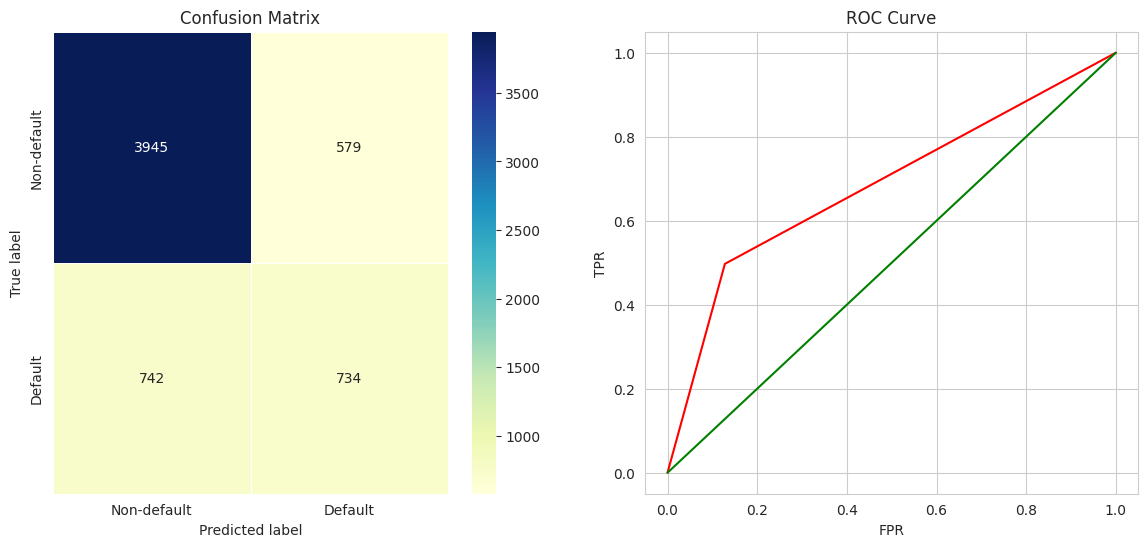

CPU times: user 14.1 s, sys: 79 ms, total: 14.2 s
Wall time: 9.21 s


In [670]:
%%time
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
radm_clf = radm_clf.fit(X_SMOTE, y_SMOTE)
Acc_mat_radm = helper(radm_clf,X_SMOTE,y_SMOTE,X_test,y_test)


Training Accuracy Score:  0.7538416233870536
Testing Accuracy Score:  0.7668333333333334
Precision on test data:  0.47167325428194995
Recall on test data:  0.5453160700685453
F1 score on test data:  0.5058283292122925

Classification Report on Train data
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77     21708
         1.0       0.67      0.80      0.73     15646

    accuracy                           0.75     37354
   macro avg       0.75      0.76      0.75     37354
weighted avg       0.77      0.75      0.76     37354


Classification Report on Test data
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      4482
         1.0       0.55      0.47      0.51      1518

    accuracy                           0.77      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.76      0.77      0.76      6000




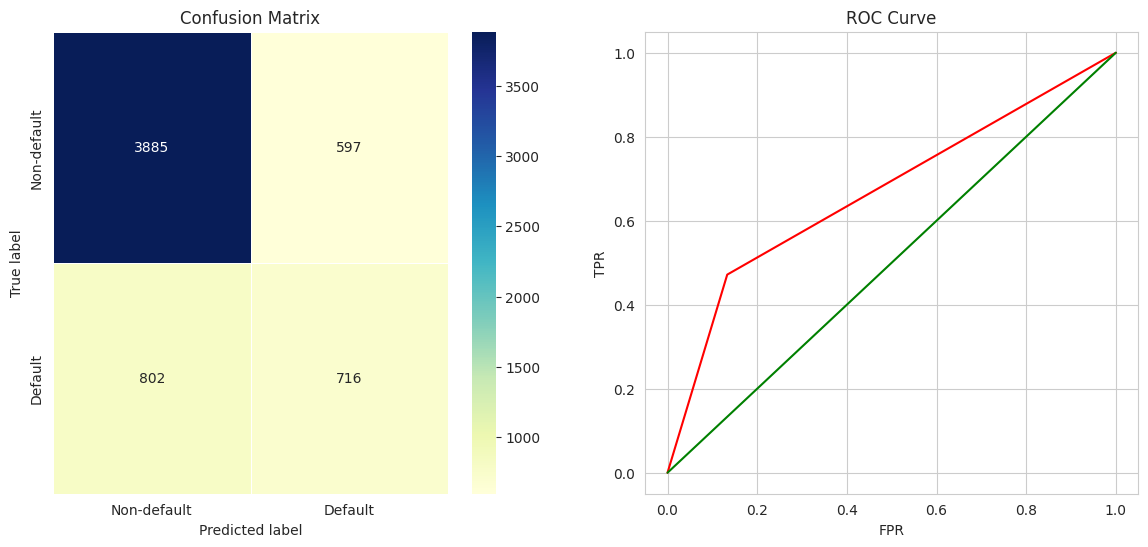

CPU times: user 6.95 s, sys: 106 ms, total: 7.05 s
Wall time: 7.06 s


In [673]:
%%time
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state=123)
adb = adb.fit(X_SMOTE, y_SMOTE)
Acc_mat_adb = helper(adb,X_SMOTE,y_SMOTE,X_test,y_test)


Training Accuracy Score:  0.9111474005461263
Testing Accuracy Score:  0.8076666666666666
Precision on test data:  0.5827263267429761
Recall on test data:  0.4265041888804265
F1 score on test data:  0.4925241864555848

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     20210
           1       0.87      0.95      0.91     17144

    accuracy                           0.91     37354
   macro avg       0.91      0.91      0.91     37354
weighted avg       0.91      0.91      0.91     37354


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      5039
           1       0.43      0.58      0.49       961

    accuracy                           0.81      6000
   macro avg       0.67      0.72      0.69      6000
weighted avg       0.84      0.81      0.82      6000




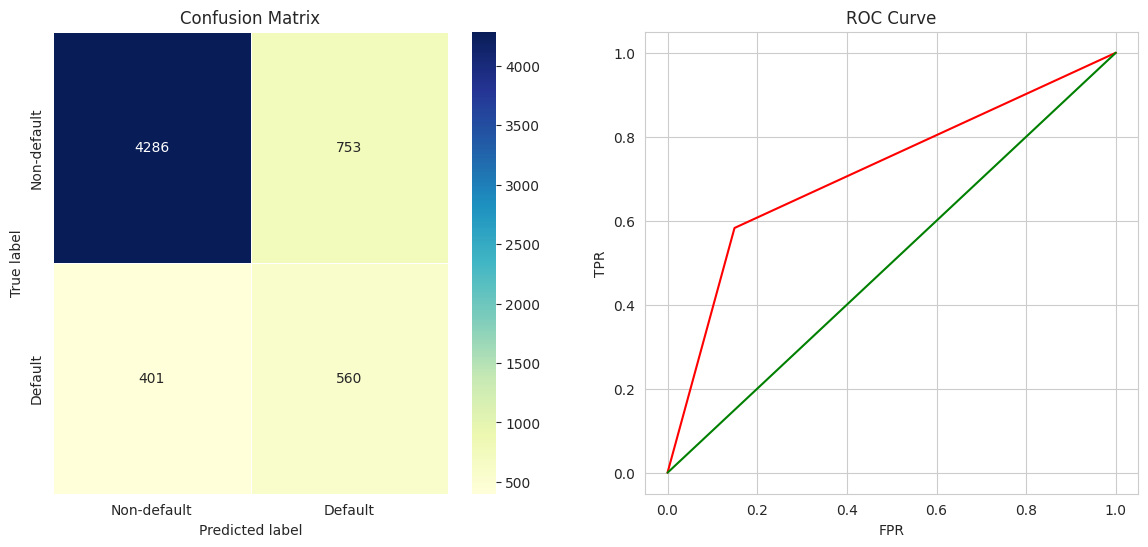

CPU times: user 2.81 s, sys: 128 ms, total: 2.94 s
Wall time: 1.96 s


In [671]:
%%time
import xgboost as xgb
xgb = XGBClassifier(random_state=123)
xgb = xgb.fit(X_SMOTE, y_SMOTE)

Acc_mat_xgb = helper(xgb,X_SMOTE,y_SMOTE,X_test,y_test)

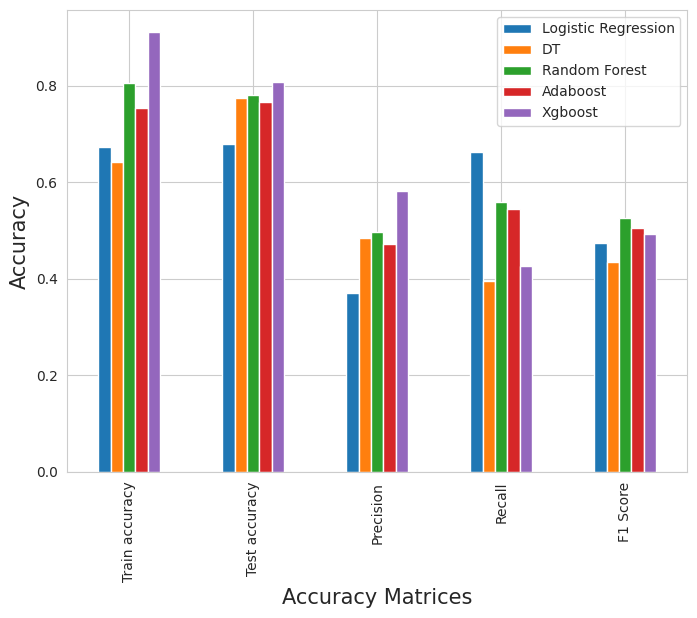

In [674]:
plot1=pd.DataFrame([Acc_mat_lr,Acc_mat_dt,Acc_mat_radm,Acc_mat_adb,Acc_mat_xgb], index=['Logistic Regression','DT','Random Forest','Adaboost','Xgboost']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Accuracy Matrices",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

In [ ]:
# XG BOOST IS GIVING BEST ACCURACY

In [ ]:
# To create a Kolmogorov-Smirnov (K-S) chart to evaluate which customers will default on their credit card payments, we typically use the predicted probabilities of default generated by a model and the actual outcomes (i.e., whether the customers defaulted or not). Below is a general outline of how to create a K-S chart using Python:

In [675]:
df1.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,0.020408,0.0,0.0,0.5,0.052632,0.8,0.8,0.2,0.2,0.0,...,0.000695,0.000811,0.001183,0.0,0.008989,0.000000,0.000000,0.0,0.000000,1.0
1,0.224490,0.0,0.0,0.0,0.105263,0.2,0.8,0.4,0.4,0.4,...,0.011415,0.012887,0.012836,0.0,0.013046,0.014286,0.014913,0.0,0.024207,1.0


In [676]:
df = df1

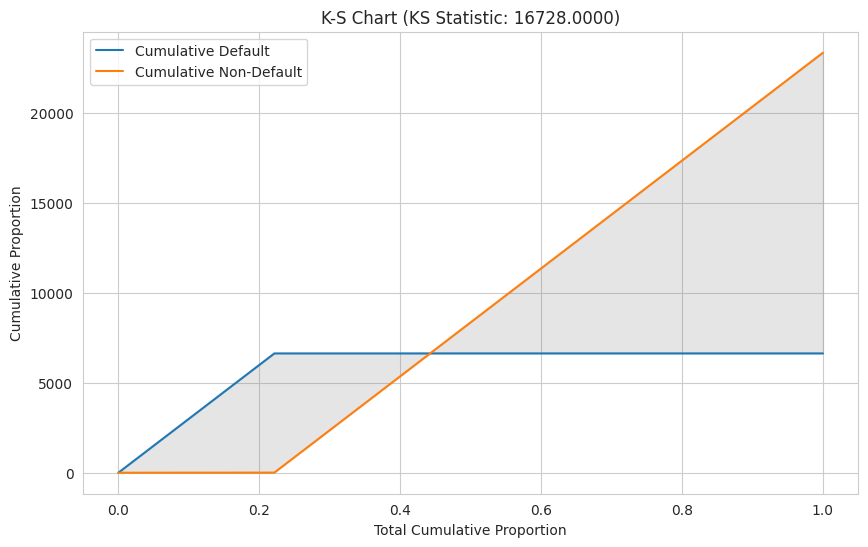

In [677]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame with the preprocessed and scaled data
# Let's say you have it in a DataFrame named 'df'

# Sort the DataFrame by predicted probabilities if available, or use 'default_payment' column directly
df = df.sort_values(by='default_payment', ascending=False)

# Calculate cumulative proportions of default and non-default cases
df['Cumulative_Default'] = np.cumsum(df['default_payment'])
df['Cumulative_Non_Default'] = np.cumsum(1 - df['default_payment'])

# Calculate cumulative proportions of total cases
df['Total_Cumulative'] = np.arange(1, len(df) + 1) / len(df)

# Calculate KS statistic: max difference between cumulative default and cumulative non-default proportions
ks_statistic = (df['Cumulative_Default'] - df['Cumulative_Non_Default']).abs().max()

# Plot K-S chart
plt.plot(df['Total_Cumulative'], df['Cumulative_Default'], label='Cumulative Default')
plt.plot(df['Total_Cumulative'], df['Cumulative_Non_Default'], label='Cumulative Non-Default')
plt.fill_between(df['Total_Cumulative'], df['Cumulative_Default'], df['Cumulative_Non_Default'], color='grey', alpha=0.2)
plt.title(f'K-S Chart (KS Statistic: {ks_statistic:.4f})')
plt.xlabel('Total Cumulative Proportion')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# The Kolmogorov-Smirnov (K-S) chart visually represents the ability of a model to discriminate between different classes, in this case, between customers who defaulted on their credit card payments and those who did not.

# Interpreting the K-S chart involves examining the maximum vertical distance (KS statistic) between the cumulative proportion of default cases and the cumulative proportion of non-default cases.

# If the KS statistic is close to 1, it indicates that the model has strong discriminatory power, meaning it effectively separates defaulters from non-defaulters.
# A lower KS statistic suggests weaker discriminatory power, implying that the model may struggle to differentiate between default and non-default cases.
# Additionally, analyzing the K-S chart can help identify the optimal threshold for classification. The point on the curve where the KS statistic is maximum corresponds to the threshold that maximizes the model's ability to discriminate between the classes.

# Overall, a K-S chart provides valuable insights into the performance of a classification model and aids in evaluating its predictive accuracy and discriminatory power.